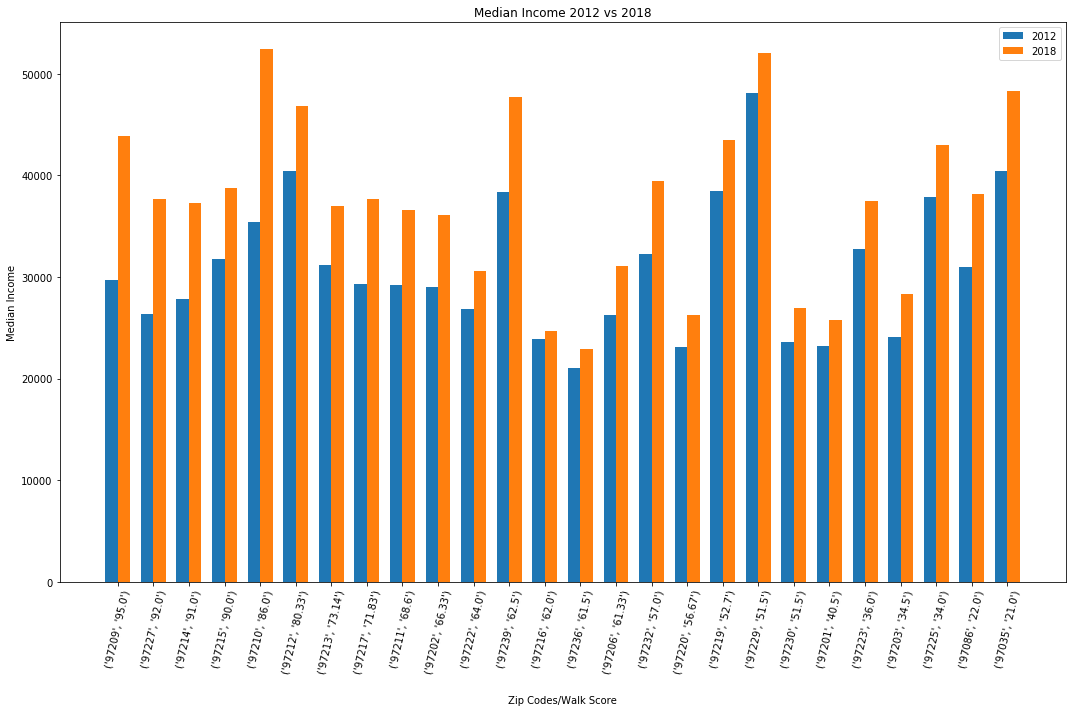

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

frankzippas = pd.read_csv('CSVs/census_walkscore_by_zip.csv')
dweezilzippas = frankzippas.sort_values('Walk Score', ascending=False).reset_index(drop=True)

zippas = dweezilzippas['Zipcode']
zippascore = round(dweezilzippas['Walk Score'], 2)

med_inc_12 = dweezilzippas['Median Income 2012']
med_inc_18 = dweezilzippas['Median Income 2018']

zip_score = [str(i) for i in zippas]
score_zip = [str(i) for i in zippascore]

zippa_scores = zip(zip_score, score_zip)

width = 0.35
x = np.arange(len(zippas))

fig, ax = plt.subplots(figsize=(15,10))
bars1 = ax.bar(x - width/2, med_inc_12, width, label='2012')
bars2 = ax.bar(x + width/2, med_inc_18, width, label='2018')

ax.set_ylabel('Median Income')
ax.set_title('Median Income 2012 vs 2018')
ax.set_xticks(x)
ax.set_xlabel('Zip Codes/Walk Score', labelpad=20)
ax.set_xticklabels(zippa_scores)
ax.tick_params('x', labelrotation=77)
ax.legend()

fig.tight_layout()
plt.show()

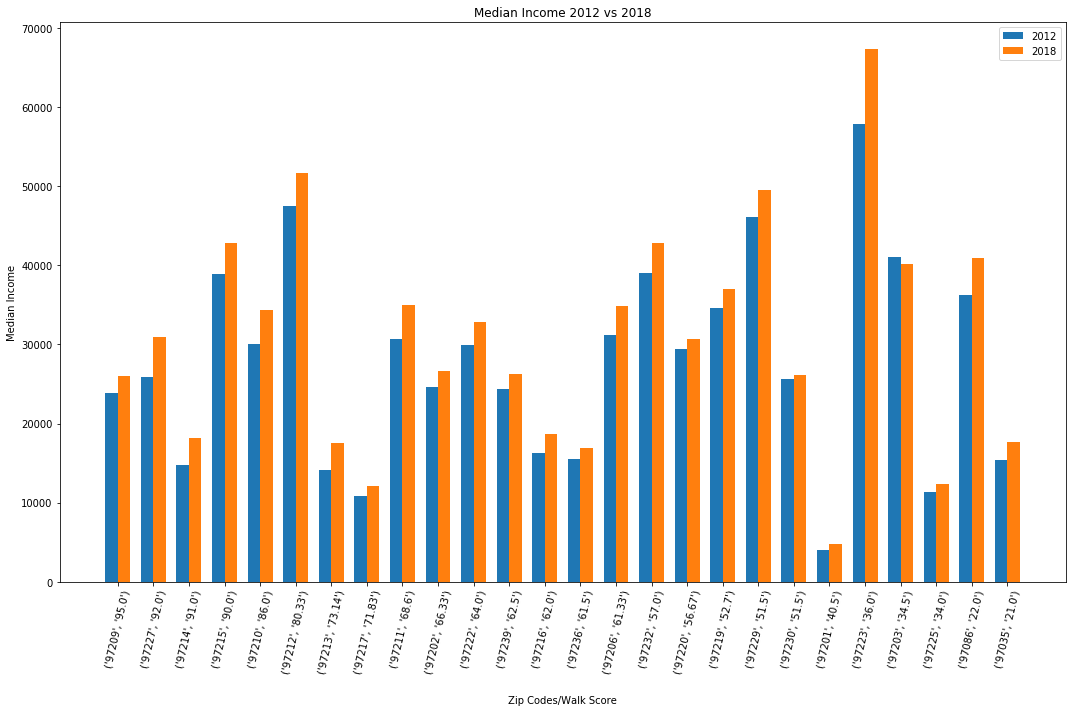

In [2]:
med_pop_12 = frankzippas['Population 2012']
med_pop_18 = frankzippas['Population 2018']

zip_score = [str(i) for i in zippas]
score_zip = [str(i) for i in zippascore]

zippa_scores = zip(zip_score, score_zip)

width = 0.35
x = np.arange(len(zippas))

fig, ax = plt.subplots(figsize=(15,10))
bars1 = ax.bar(x - width/2, med_pop_12, width, label='2012')
bars2 = ax.bar(x + width/2, med_pop_18, width, label='2018')

ax.set_ylabel('Median Income')
ax.set_title('Median Income 2012 vs 2018')
ax.set_xticks(x)
ax.set_xlabel('Zip Codes/Walk Score', labelpad=20)
ax.set_xticklabels(zippa_scores)
ax.tick_params('x', labelrotation=77)
ax.legend()

fig.tight_layout()
plt.show()

In [113]:
crime_2015 = pd.read_csv('CSVs/CrimeData-2015.csv')
crime_2018 = pd.read_csv('CSVs/CrimeData-2018.csv')
pdx_walk_df = pd.read_csv('CSVs/PDX_Neighborhood_Walkability.csv')
zip_walk_df = pd.read_csv('CSVs/zip_import.csv')

crime_2015 = crime_2015.loc[crime_2015['Neighborhood'].isnull() == False]
crime_2018 = crime_2018.loc[crime_2018['Neighborhood'].isnull() == False]

gcrime_2015 = crime_2015.groupby(['Neighborhood']).size().reset_index(name='OffenseCount2015')
gcrime_2018 = crime_2018.groupby(['Neighborhood']).size().reset_index(name='OffenseCount2018')

ccrime_df = pd.merge(gcrime_2015, gcrime_2018, how='inner', on='Neighborhood')

ccrime_df.iloc[ccrime_df.loc[combined_crime['Neighborhood'] == 'Old Town/Chinatown'].index, 0] = 'Old Town Chinatown'
ccrime_df.iloc[ccrime_df.loc[combined_crime['Neighborhood'] == 'Lloyd'].index, 0] = 'Lloyd District'
ccrime_df.iloc[ccrime_df.loc[combined_crime['Neighborhood'] == 'Mt Scott-Arleta'].index, 0] = 'Mt. Scott-Arleta'
ccrime_df.iloc[ccrime_df.loc[combined_crime['Neighborhood'] == 'Mt Tabor'].index, 0] = 'Mt. Tabor'
ccrime_df.iloc[ccrime_df.loc[combined_crime['Neighborhood'] == 'St Johns'].index, 0] = 'St. Johns'
ccrime_df.iloc[ccrime_df.loc[combined_crime['Neighborhood'] == 'Northwest'].index, 0] = 'Northwest District'
ccrime_df.iloc[ccrime_df.loc[combined_crime['Neighborhood'].str.contains('Buckman')].index, 0] = 'Buckman'

pdx_crime_df = pd.merge(ccrime_df, pdx_walk_df, how='outer', left_on='Neighborhood', right_on='Name')
cc_walk_df = crime_walk_df.loc[(crime_walk_df['Name'].isnull() == False)][['Name', 'Population', 'OffenseCount2015', 'OffenseCount2018']]

cc_vs_walk = pd.merge(cc_walk_df, zip_walk_df, how='outer', left_on='Name', right_on='name')
cc_vs_walk = cc_vs_walk[['Name', 'Walk Score', 'OffenseCount2015', 'OffenseCount2018', 'Population', 'lat', 'lng', 'Zipcode']]

cc_vs_walk = cc_vs_walk.loc[cc_vs_walk['Zipcode'].isnull() == False].reset_index(drop=True)
cc_vs_walk['Zipcode'] = cc_vs_walk['Zipcode'].astype(int)

cc_vs_walk

,Name,Walk Score,OffenseCount2015,OffenseCount2018,Population,lat,lng,Zipcode
0,Alameda,65.0,102,168,"5,206",45.544656,-122.626080,97212
1,Arbor Lodge,77.0,319,465,"6,131",45.577213,-122.678591,97217
2,Arlington Heights,35.0,66,73,784,45.516569,-122.699493,97201
3,Arnold Creek,21.0,22,25,"2,850",45.439449,-122.707645,97035
4,Ashcreek,36.0,53,98,"5,705",45.467338,-122.748808,97223
...,...,...,...,...,...,...,...,...
67,University Park,53.0,215,260,"5,996",45.574956,-122.707959,97217
68,Vernon,88.0,92,177,"2,630",45.557687,-122.642908,97211
69,West Portland Park,57.0,68,185,"3,923",45.440351,-122.727222,97219
70,Wilkes,31.0,325,543,"8,768",45.533852,-122.625361,97232


In [114]:
cc_vs_walk.to_csv('CSVs/crime_vs_walkscore.csv')